#  Audi used cars Exploratory Data Analysis(EDA)

<br>Md. Tawhidul Islam Bhuiyan
<br>Bsc 4th year, Rajshahi University of Engineering & Technology.

**Objectives:**

-Familiarity with Matplotlib and Seaborn

-Data Analysis using NumPy and Pandas

**Exploratory Data Analysis**
1. Reading the data as Pandas DataFrame
2. Checking the data types and looking for missing values
3. Checking the basic statistics of the numerical variables
4. Checking the unique values of the categorical features
5. Exploring the data using:
    1. Barplots
    2. Scatterplots
    3. Histogram
    4. Distribution
    5. Empirical Cumulative Distribution Function
    6. Boxplot
6. Data Filtering
7. Data aggregation for counting average selling price and total selling price respect to model column
8. Data Visualization for calculating average selling price and total selling price in terms of top five selling cars' model
9. Data aggregation for counting average selling price and total selling price respect to transmission column
10. Data Visualization for calculating average selling price and total selling price in terms of transmission column
11. Data aggregation for counting average selling price and total selling price respect to fuelType column
12. Data Visualization for calculating average selling price and total selling price in terms of fuelType column
13. Pivot table for calculating average and total selling prices of cars in terms of model column
14. Pivot table for calculating average and total selling prices of cars in terms of transmission column
15. Pivot table for calculating average and total selling prices of cars in terms of fuelType column    


**References:**
<br> Dataset Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw


# Importing required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

#### Read the Audi dataset from the csv file

In [2]:
df = pd.read_csv("audi.csv")

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


#### The Feature variables of the given dataset :
**model**: models of the Audi cars
<br>**year**: the year car was made
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:
**price**: the selling price of the car

In [3]:
# check for missing values, data types of the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

Number of observations (rows) = 10668
<br>Number of columns = 8 (7 feature variables and 1 target variable)
<br>Number of categorical variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 5: year, price, mileage, mpg, engineSize

<br>**The dataset has no missing values**

In [4]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


#### Observations:
- The oldest car in the dataset is from 1997
- The latest car is from 2020
- The average price of each used car is \\$22896
- The most expensive car price is \\$145000 and the cheapest car price is \\$1490
- The lowest mileage is 1 mile and highest mileage is 323000 miles
- The lowest mpg is 18.9 and highest mpg is 188.3
- Engine Size varies from 0 to 6


# Data Exploration using different types of plotting and graphs

# Function for unique percentage of the columns of Dataframe

In [5]:
def unique_percent_count(data, col):

    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)

    col_count = col_count.reset_index()

    

    col_count = col_count.rename(columns={'index':col, col:'% of cars'})
    col_count['% of cars'] = col_count['% of cars']*100
    

    col_count = col_count.round(2)
    
    return col_count



In [6]:
fuelType_count = unique_percent_count(df, 'fuelType')

display(fuelType_count)


,fuelType,% of cars
0,Diesel,52.28
1,Petrol,47.46
2,Hybrid,0.26


In [7]:
transmission_count = unique_percent_count(df, 'transmission')

display(transmission_count)

    

,transmission,% of cars
0,Manual,40.95
1,Semi-Auto,33.66
2,Automatic,25.38


In [8]:
model_count = unique_percent_count(df, 'model')

display(model_count.head())
 

,model,% of cars
0,A3,18.08
1,Q3,13.28
2,A4,12.95
3,A1,12.63
4,A5,8.27


In [9]:
year_count = unique_percent_count(df, 'year')

#display(year_count)

year_count = year_count.sort_values(by='year')

display(year_count.head(5))
display(year_count.tail(5))



,year,% of cars
19,1997,0.01
20,1998,0.01
18,2002,0.02
16,2003,0.06
17,2004,0.05


,year,% of cars
1,2016,18.41
2,2017,18.14
4,2018,8.10
0,2019,29.97
5,2020,6.71


# Function to show the Data Visualization for unique percentage in a column using a barplot

In [10]:
def barplot(data, x_col, y_col, color, rotation):
    sns.barplot(x=x_col, y=y_col, data=data, color=color)
    plt.title("Percentage of AUDI Cars for each " + x_col )
    
    #plt.yticks(np.arange(0,21,2))
    plt.xticks(rotation=rotation)


**Creating Subplots to visualize categorical variables**

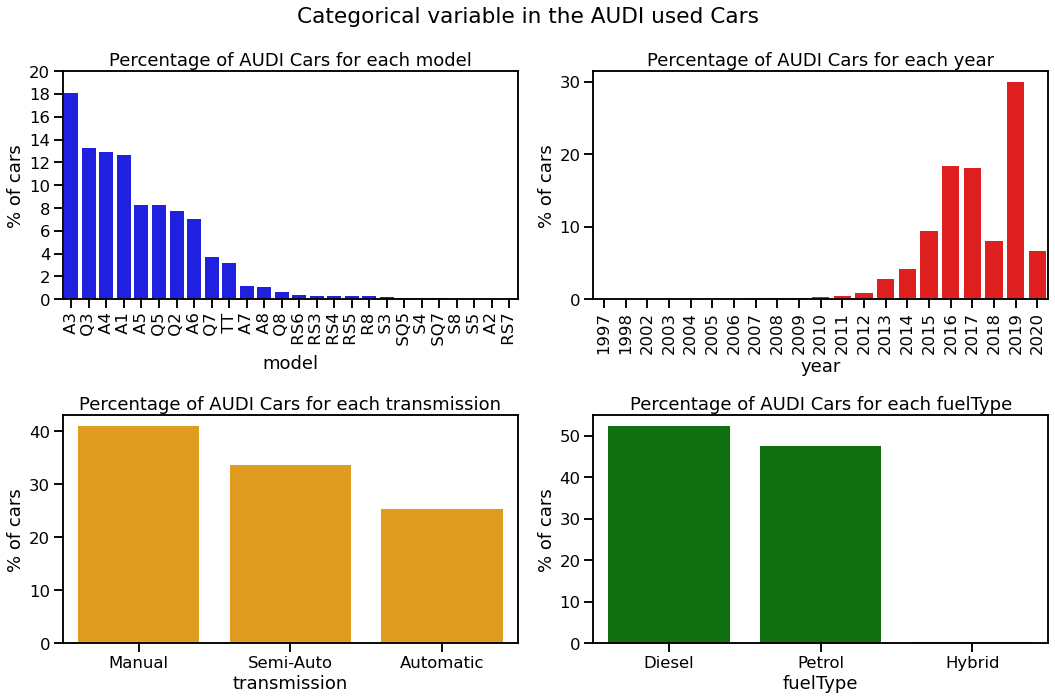

In [11]:
sns.set_context("talk")

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
barplot(model_count, 'model', '% of cars', 'blue', 90)
plt.yticks(np.arange(0,21,2))

plt.subplot(2,2,2)
barplot(year_count, 'year', '% of cars', 'red', 90)



plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', '% of cars', 'orange', 0)




plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', '% of cars', 'green', 0)



plt.suptitle("Categorical variable in the AUDI used Cars")


plt.tight_layout()
#plt.savefig("barplot.png")

plt.savefig("barplot2.jpg")

plt.show()

-In the first figure shows the percentage distribution of used Audi cars based of the model.

<br> - The 2nd figure shows the percentage of used Audi cars per year, from 1997 to 2020. We can see **approximately 29% cars released in the year 2019.**

<br> - The 3rd figure shows the percentage of Audi used cars in three varieties of transmissions where **about 40% cars are manual, 34% cars are semiauto and 25% cars are automatic**. Here, Maximum number of cars are manual and minimum number of cars are automatic. 

<br> - The 4th figure shows the percentage of used Ford cars with fuel types distribution such as Diesel, Petrol and Hybrid. We can also see about **52% cars fueltype is diesel and 48% cars fueltype is petrol.**


# **Scatterplot of the features and target variable 'price'**
<br>**To understand the relationship between numerical variables (mileage, mpg and engine size) and target variable (price), scatterplot can be one of the best options**

<br>Changes in price in relation to mileage
<br>Changes in price in relation to miles per gallon (mpg)
<br>Changes in price in relation to engine size

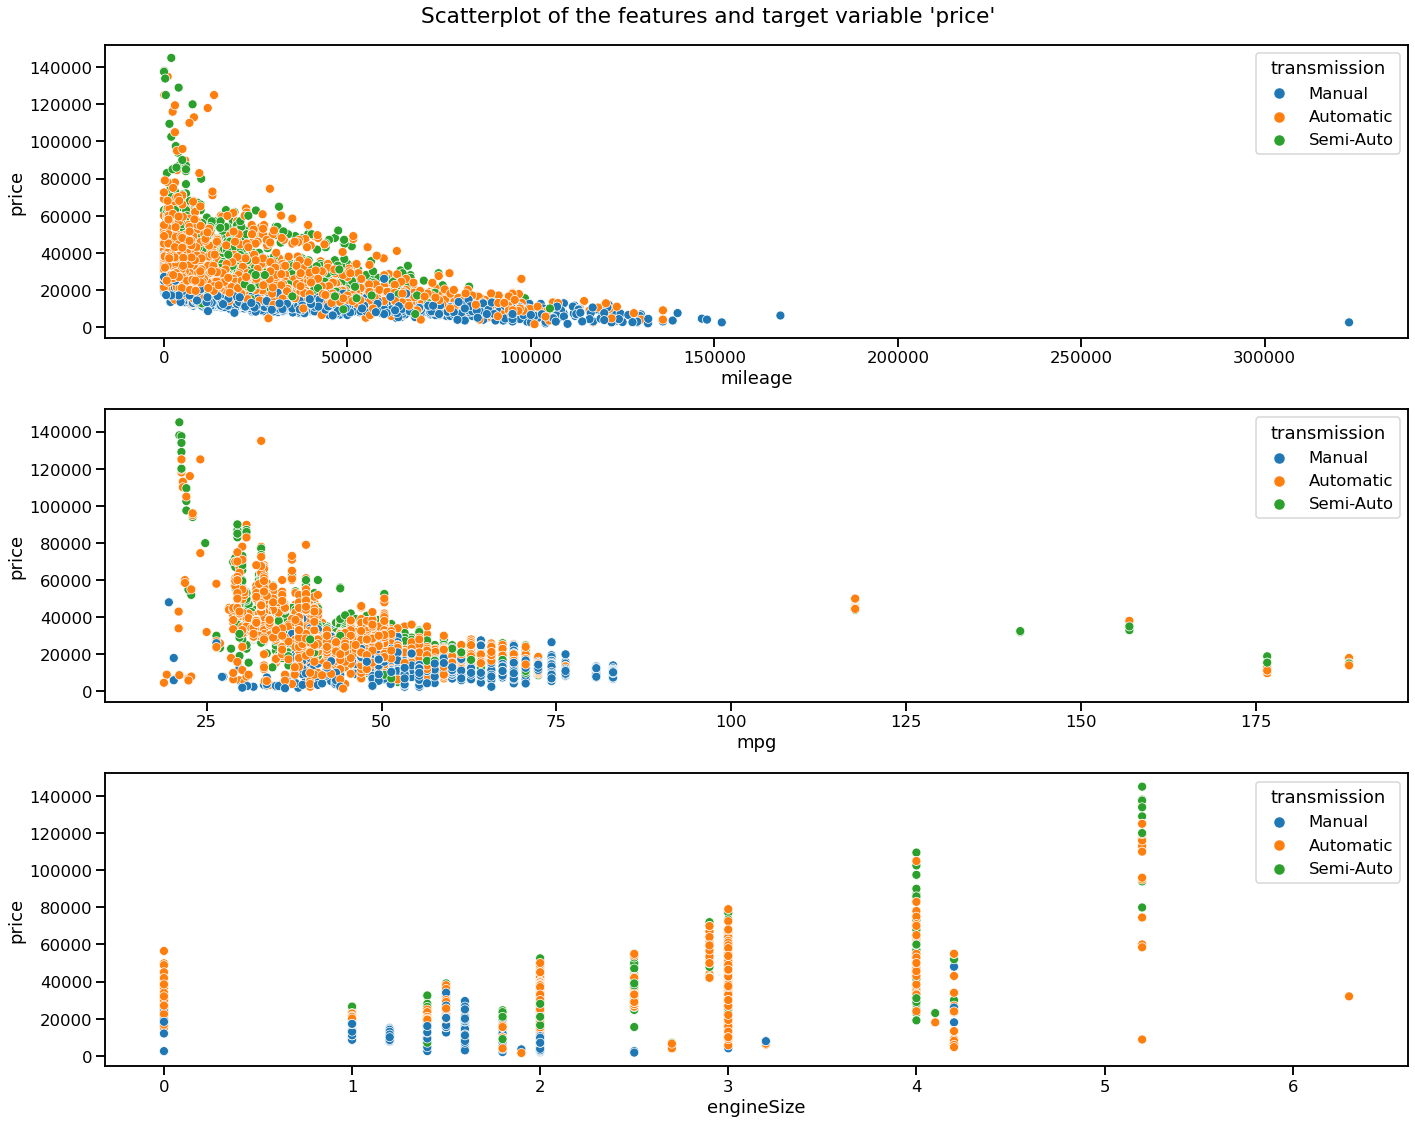

In [12]:
plt.figure(figsize=(20,16))

# mileage vs price
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')

# mpg vs price
plt.subplot(3,1,2)
sns.scatterplot(x='mpg', y='price', data=df, hue='transmission')

# engineSize vs price
plt.subplot(3,1,3)
sns.scatterplot(x='engineSize', y='price', data=df, hue='transmission')

# # mpg vs enginesize
# plt.subplot(2,2,4)
# sns.scatterplot(x='mpg', y='engineSize', data=df)


plt.suptitle("Scatterplot of the features and target variable 'price'")
plt.tight_layout()
plt.show()

From the above **first mileage vs price** figure we can see that, the price is decreasing when the mileage is increasing. So there is an inverse relation between mileage and price.

<br> The **second mpg vs price** figure also demonstrates the same inverse relation between mpg and price where most of manual cars price are below 20000USD and most of the automatic cars price in between 20000 to 60000 USD.

<br> From the **engineSize vs price** figure we can assume a proportional relation between engineSize vs price.

# Scatterplot with the regression line

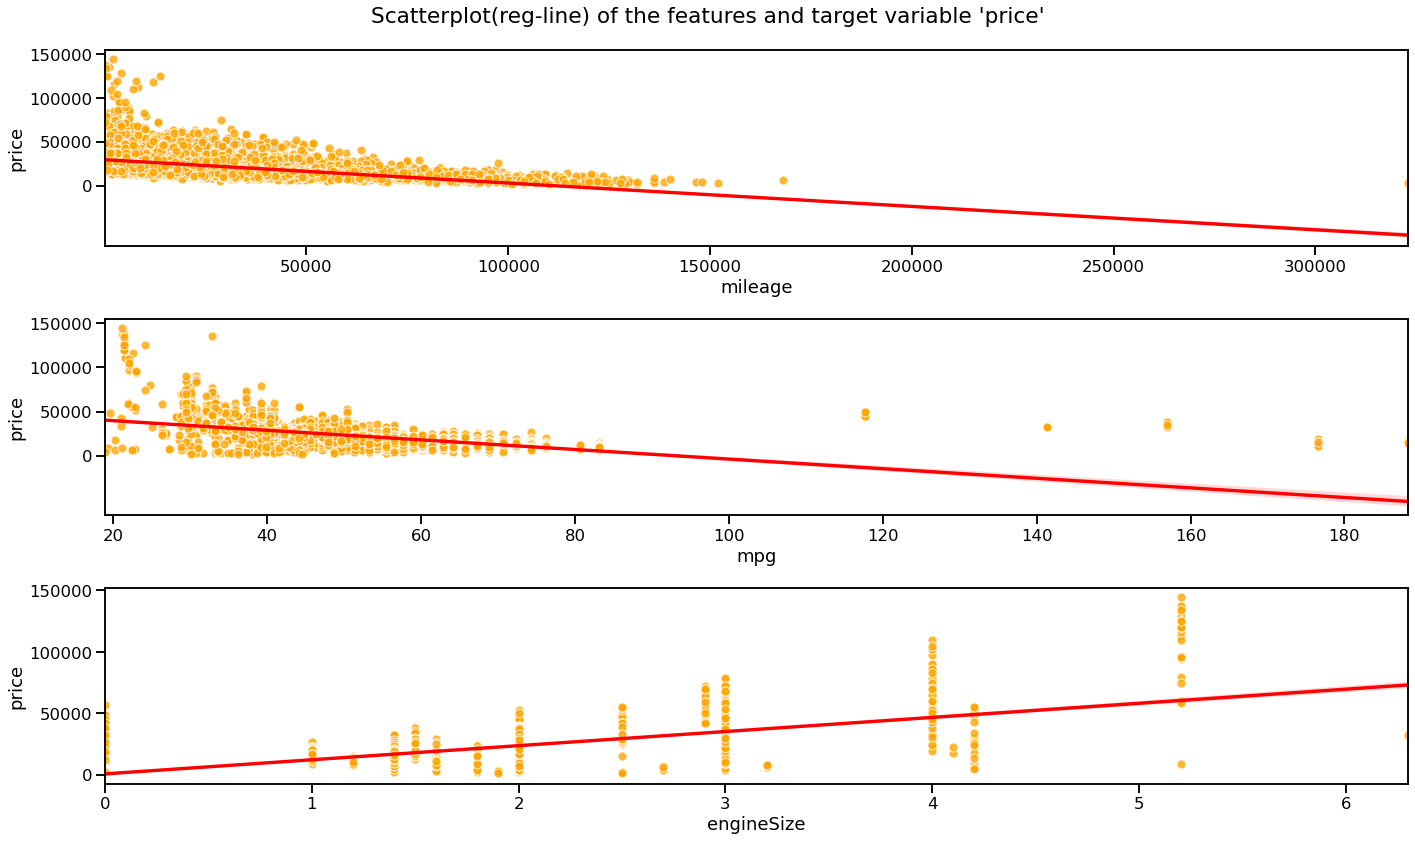

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'white'}, line_kws={'color':'r'})
plt.yticks(np.arange(0,150001,50000))


plt.subplot(3,1,2)
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'white'}, line_kws={'color':'r'})
#plt.xticks(np.arange(0,181,20))
plt.yticks(np.arange(0,150001,50000))


plt.subplot(3,1,3)
sns.regplot(x='engineSize', y='price', data=df, 
            scatter_kws={'color':'orange', 'edgecolor':'white'}, line_kws={'color':'r'})


plt.suptitle("Scatterplot(reg-line) of the features and target variable 'price'")
plt.tight_layout()
plt.show()

**When we add the trend line in order to fit numerical feature variable with the target variable 'price', we can see that, we can mostly fit them linearly.**

So, the conclusion is Linear models will perform best to predict the resale price is true. 

# Histogramic Analysis for Audi Used Cars Based on Year, Price, Mileage and mpg

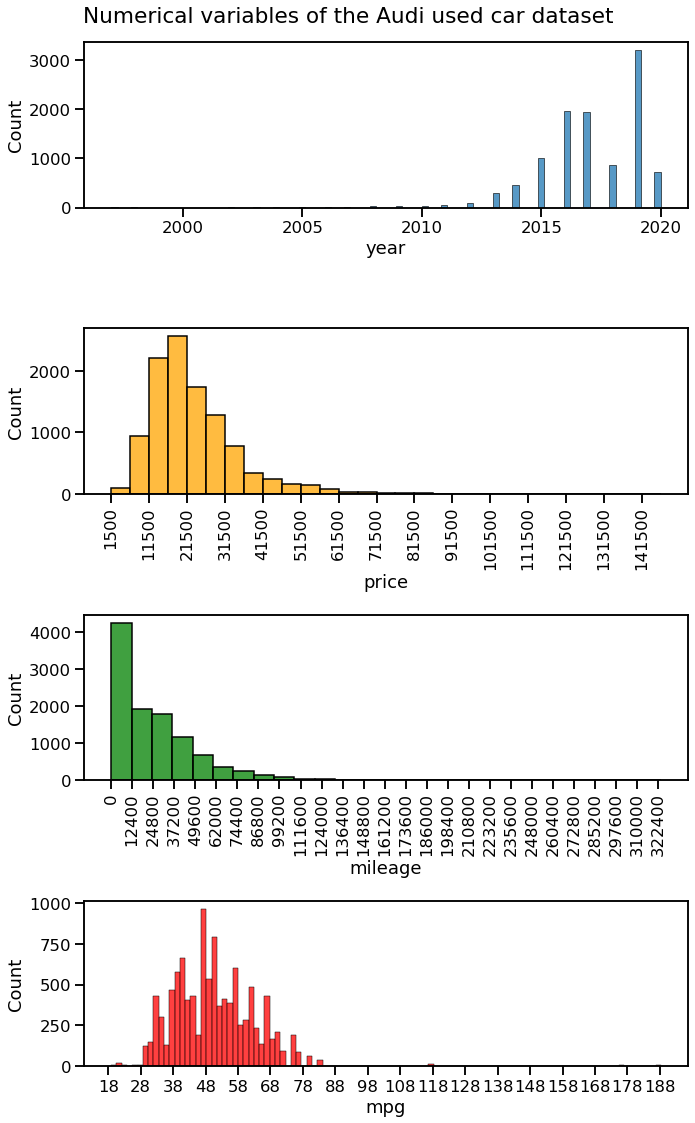

In [14]:
plt.figure(figsize=(10,16))
plt.subplot(4,1,1)
sns.histplot(data=df, x= 'year')


plt.subplot(4,1,2)
sns.histplot(data=df, x= 'price', binwidth=5000, color='orange')
plt.xticks(np.arange(1500,145001,10000), rotation=90)


plt.subplot(4,1,3)
sns.histplot(data=df, x= 'mileage', binwidth=12000, color='green')
plt.xticks(np.arange(0, 325000,12400), rotation=90)


plt.subplot(4,1,4)
sns.histplot(data=df, x= 'mpg', color='red')
plt.xticks(np.arange(18,190,10))


plt.suptitle("Numerical variables of the Audi used car dataset")
plt.tight_layout()
plt.show()

**Histogramic Observation**
By analyzing the Histogram subplots we come to these conclusions


- From the above figure the **year based Hisgram** we can see, maximum number of cars for example, **20000 to 30000** are realeased in between the year **2015 to 2020**.

- From the above figure the **Price based Hisgram** shows that the price sustaining in between **1500 to 71500 USD.**

- From the above figure the **mileage based Hisgram** shows the most number of cars have the mileage between **0 to 12400.**

- From the above figure the **mpg based Hisgram** shows the **random distribution** and maximum cars are in between the mpg **38 to 58.**

# **Distribution subplotting of all the numeric columns in the dataframe**

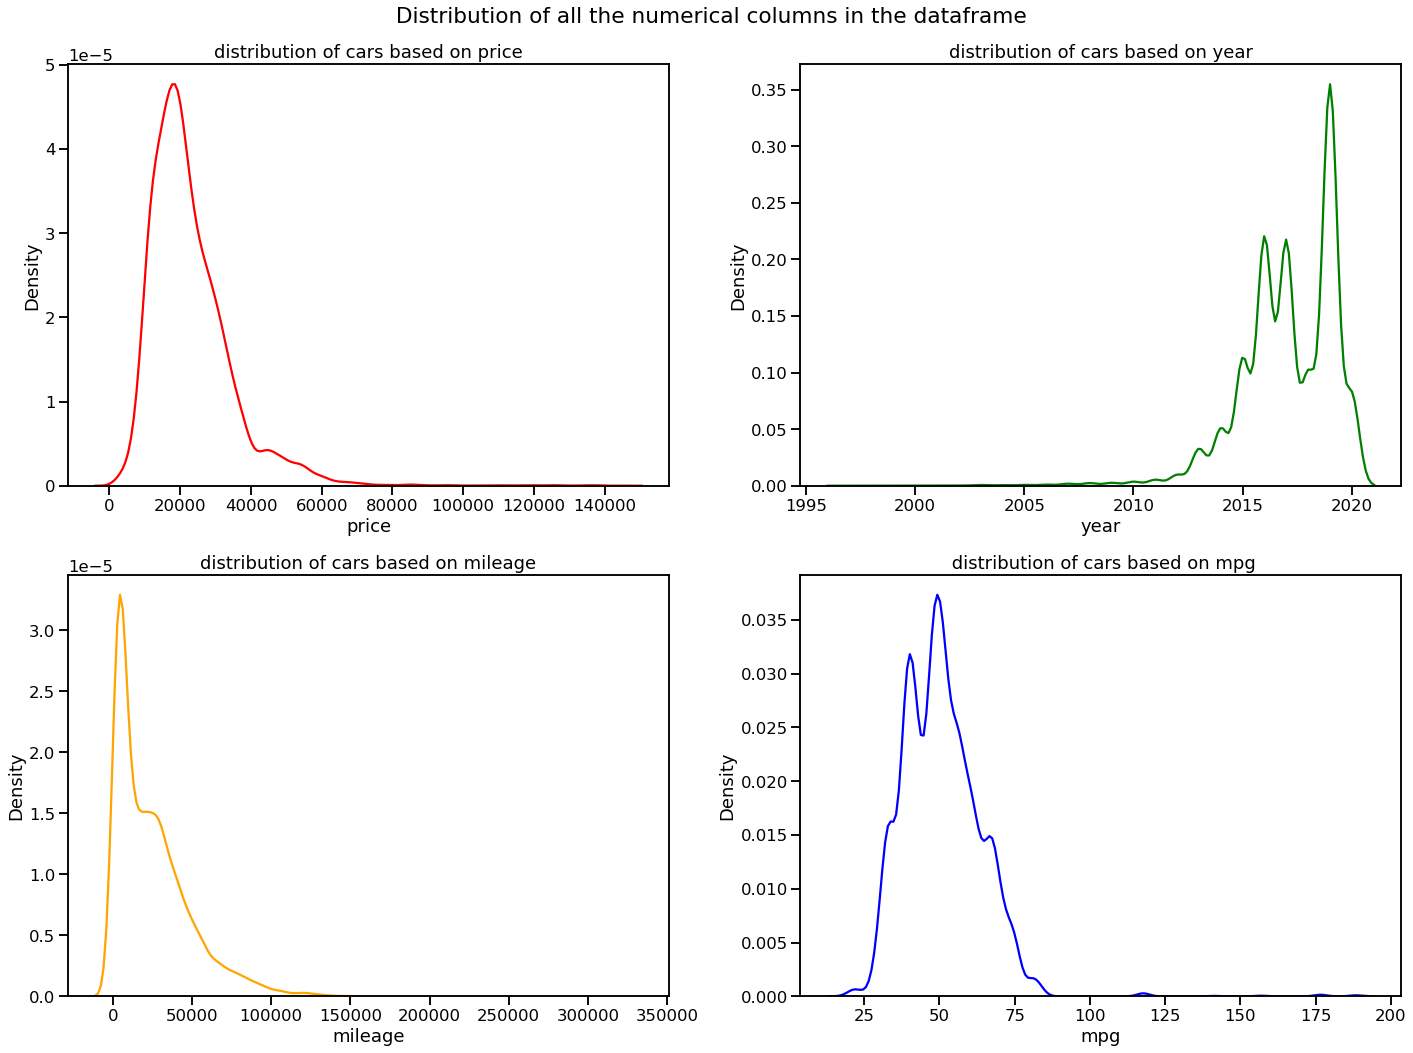

In [15]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(2,2,1)
sns.kdeplot(data=df, x='price' , color= 'red')
plt.title("distribution of cars based on price")


#subplot row1 column2 year 
plt.subplot(2,2,2)
sns.kdeplot(data=df, x='year' , color= 'green')
plt.title("distribution of cars based on year")


#subplot row2 column1 milage 
plt.subplot(2,2,3)
sns.kdeplot(data=df, x='mileage' , color='orange' )
plt.title("distribution of cars based on mileage")

#subplot row2 column2 miles per gallon 
plt.subplot(2,2,4)
sns.kdeplot(data=df, x='mpg' ,  color= 'blue')
plt.title(" distribution of cars based on mpg")



plt.suptitle(" Distribution of all the numerical columns in the dataframe")
plt.tight_layout()
plt.show()

By analyzing the distribution subplots we can see that
        
   in 1st fig, Distribution of the price column is Unimodal.
   <br>in 2nd fig, Distribution of the year column is Multimodal.
   <br>in 3rd fig, Distribution of the milage column is Unimodal.
   <br>in 4th fig, Distribution of the mpg column is Bimodal.
   


# ECDF Analysis of Audi used car  for Price and Mileage

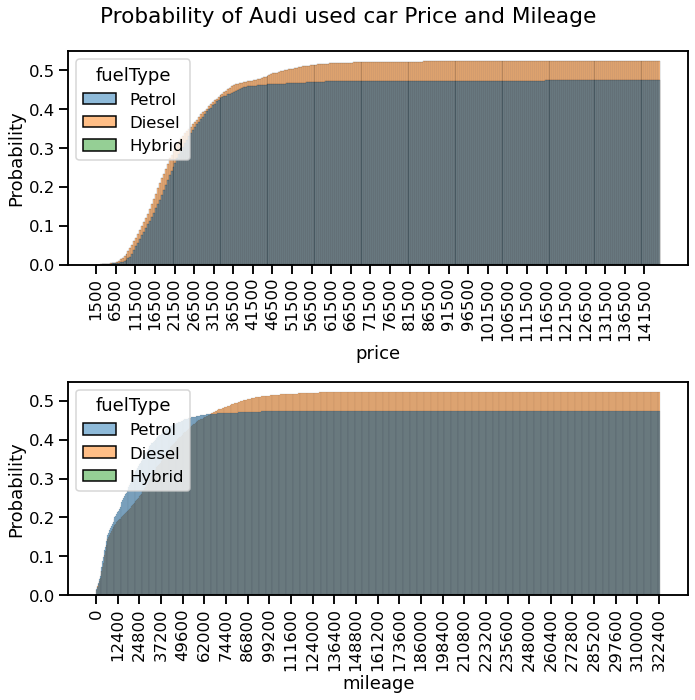

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(data=df, x= 'price', binwidth=500, color='blue', cumulative=True, stat='probability', hue='fuelType')
plt.xticks(np.arange(1500,145000,5000))
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.histplot(data=df, x= 'mileage', binwidth=500, color='green', cumulative=True, stat='probability', hue='fuelType')
plt.xticks(np.arange(0,325000,12400))
plt.xticks(rotation=90)

plt.suptitle("Probability of Audi used car Price and Mileage")
plt.tight_layout()
plt.show()

- The first figure shows the **Probabilistic Empirical Cumulative Distribution Function(ECDF)** for Audi used car price. We also can compare the fueltype according to the price where we can clearly see that the probability of the price of Diesel fuel type cars are comparatively higher.

- The second figure shows the **Probabilistic Empirical Cumulative Distribution Function(ECDF)** for Audi used car mileage. We also can compare the fueltype according to the mileage where we can clearly see that the probability of the mileage of Diesel fuel type cars are comparatively higher.
 

**ECDF subplot numeric columns(Price & Mileage) in the dataframe**

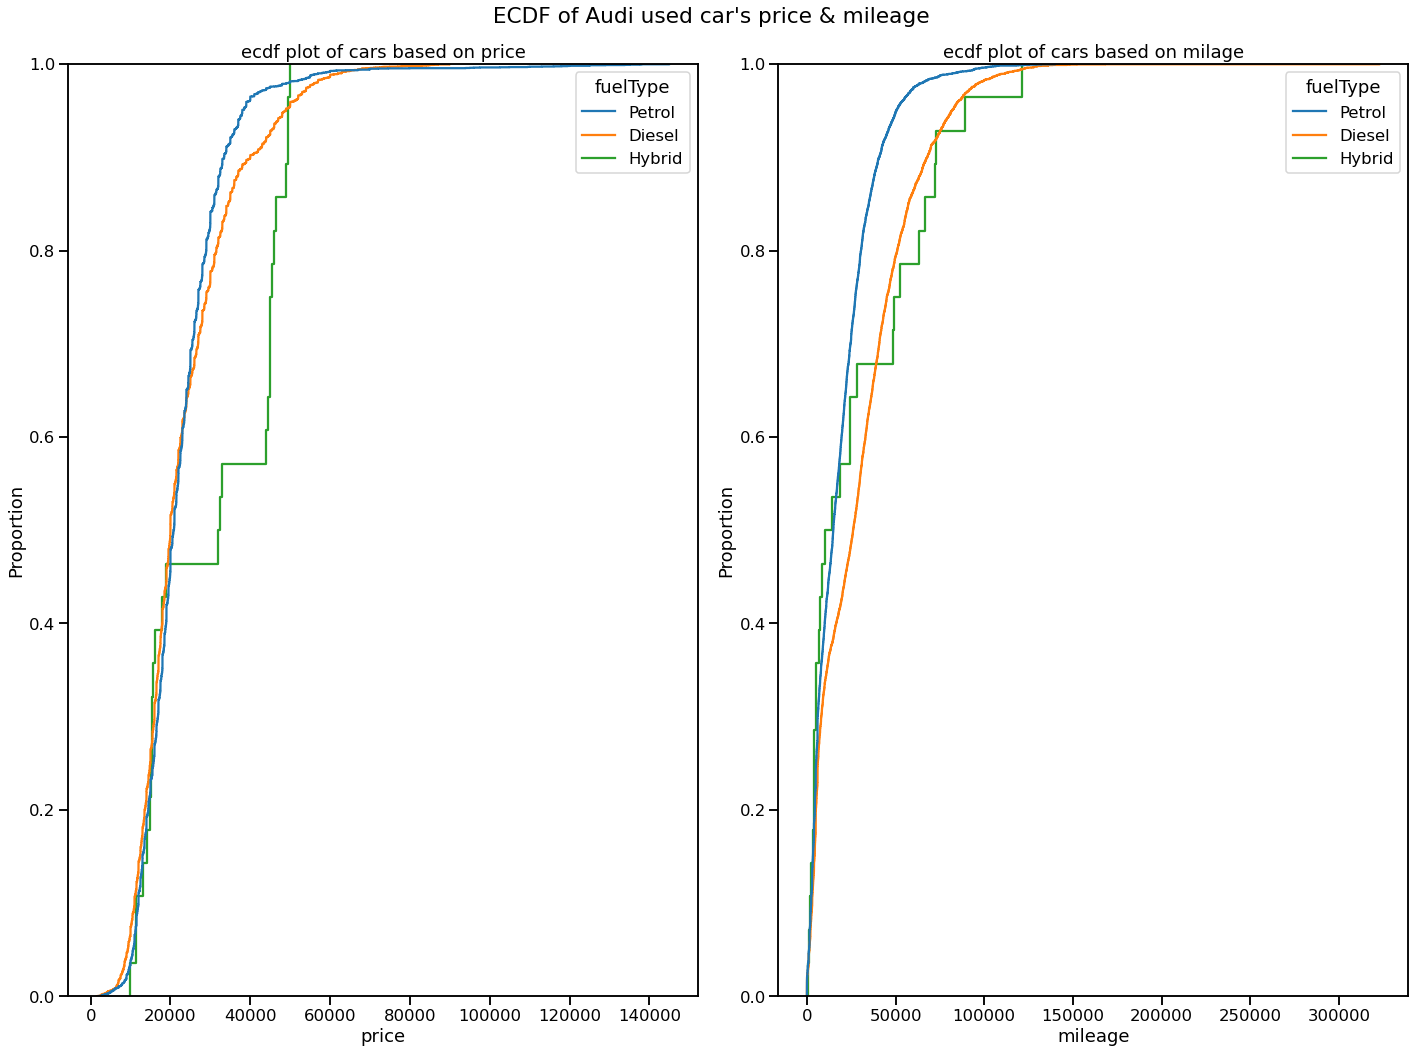

In [17]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(1,2,1)
sns.ecdfplot(data=df, x='price', color= 'red', hue='fuelType')
plt.title("ecdf plot of cars based on price")




#subplot row1 column2 milage 
plt.subplot(1,2,2)
sns.ecdfplot(data=df, x='mileage', color= 'orange', hue='fuelType' )
plt.title("ecdf plot of cars based on milage")





plt.suptitle(" ECDF of Audi used car's price & mileage")


plt.tight_layout()
plt.show()

By analyzing the distribution subplots we can see that,

From this ECDF (Empirical Cumulative Distribution Function) plot we can easily guess the total counts are higher for petrol type of fuel but it does not clearly indicates about the change of price rate based on 'fuelType' and the change of mileage based on 'fuelType' like other two plots (histogram and distribution plot). That's why,in my opinion using histogram or distribution plot in such kind of cases may be more fruitful than using ECDF plot.
        
   

# Boxplot for Audi used cars price and mileage analysis based on fuelType and transmission respectively

In [18]:
# plt.figure(figsize=(4,4))
# sns.boxplot(x=df["price"], showfliers=False)
            
# plt.show()

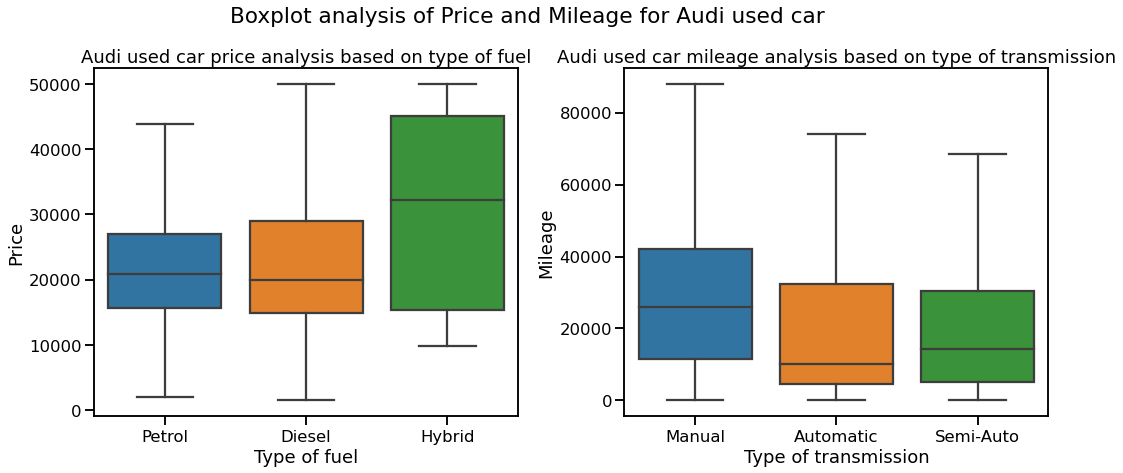

In [19]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x='fuelType', y='price', data= df, showfliers= False)
plt.xlabel("Type of fuel")
plt.ylabel("Price")
#plt.yticks(np.arange(1000,145000,5000))
plt.title("Audi used car price analysis based on type of fuel")

plt.subplot(2,2,2)
sns.boxplot(x='transmission', y='mileage', data= df, showfliers= False)
plt.xlabel("Type of transmission")
plt.ylabel("Mileage")
plt.title("Audi used car mileage analysis based on type of transmission")

plt.suptitle("Boxplot analysis of Price and Mileage for Audi used car")
plt.tight_layout()
plt.show()

#### We can see from the boxplot of Type of fuel vs Price are -
**For Petrol** 
- The cars minimum price is nearly 2000 USD and maximum price is around 45000 USD
- The median price is nearly 22000 USD
- The price range is around 43000 USD
- 25% and 75% percentile price are 16000 and 27000 USD respectively.
- IQR or inter quartile range is about 11000
- The tendency of petrol car prices are comparatively lesser than the others.

**For Diesel**
- The cars minimum price is around 1900 USD and maximum price is around 50000 USD
- The median price is around 20000 USD
- The price range is 48100 USD
- 25% and 75% price are 15000 and 29000 USD respectively.
- IQR or inter quartile range is about 14000
- The tendency of petrol car prices are comparatively lesser than the Petrols.

**For Hybrid**
- The cars minimum price is around 11000 USD and maximum price is around 50000 USD
- The median price is around 32000 USD
- The price range is 39000 USD
- 25% and 75% price are 16000 and 45000 USD respectively.
- IQR or inter quartile range is about 29000
- The tendency of petrol car prices are comparatively higher than the others


####  We can see from the boxplot of transmission vs Mileage are -
**For Manual**
- The cars minimum mileage is around 0 and maximum mileage is around 90000
- The median mileage is around 28000
- The mileage range is 90000
- 25 percentile and 75 percentile mileage are about 16000 and 41000 respectively.
- IQR or inter quartile range is about 25000

**For Automatic**
- The cars minimum mileage is around 0 and maximum mileage is around 77000
- The median mileage is about 15000
- The mileage range is around 77000
- 25 percentile and 75 percentile mileage are about 14000 and 30000 respectively.
- IQR or inter quartile range is about 16000

**For Semi Auto**
- The cars minimum mileage is around 0 and maximum mileage is around 70000
- The median mileage is about 18000
- The mileage range is around 70000
- 25 percentile and 75 percentile mileage are about 14000 and 37000 respectively.
- IQR or inter quartile range is about 23000


#### Checking the Number of unique values present in the 'Model' column


In [20]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


In [21]:
#Data Filtering
df_a7 = df[df['model'] == ' A7']

display(df_a7)
print(df_a7.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
116,A7,2014,19500,Automatic,55774,Diesel,44.8,3.0
203,A7,2019,39985,Automatic,5201,Diesel,38.7,3.0
234,A7,2019,43885,Semi-Auto,10,Diesel,38.2,3.0
350,A7,2019,32985,Automatic,1285,Diesel,39.2,3.0
476,A7,2019,41995,Semi-Auto,933,Diesel,45.6,2.0
...,...,...,...,...,...,...,...,...
10341,A7,2020,45000,Automatic,1200,Diesel,38.2,3.0
10414,A7,2019,48790,Automatic,4700,Diesel,35.8,3.0
10441,A7,2016,22990,Semi-Auto,26000,Diesel,52.3,3.0
10585,A7,2016,43000,Automatic,55500,Petrol,29.7,4.0


(122, 8)


#### Data Aggregation respect to model column

In [22]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


#### Data preprocessing before visualization with respect to model

In [23]:
# sorting the dataframe depends on Count column
df_agg = df_agg.sort_values(by='count', ascending=False)

# new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# converting the sum column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding
df_agg = df_agg.round(2)

# removing the count column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


#### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType
#### Questions in mind: Based on model, transmission and fuelType,

- (a)What are the top 5 selling car models in the dataset?
- (b)What's the average selling price of the top 5 selling car models?
- (c)What's the total sale of the top 5 selling car models?

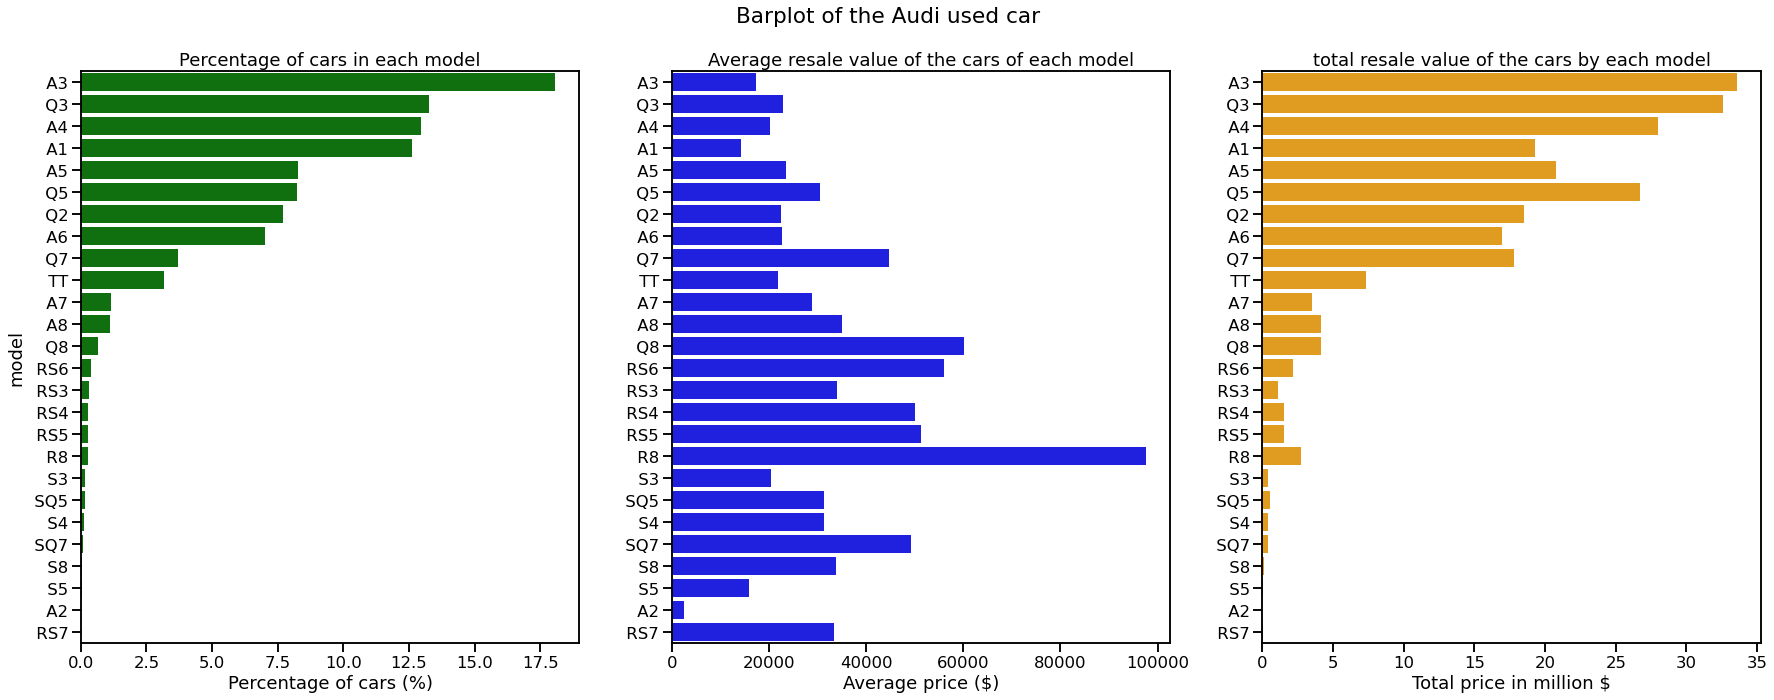

In [24]:
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='Green')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

#### From the above Data Visualiation we can come to the conclusion that :
- a)Top five selling car models are A3(18%), Q3(13%), A4(12.8%), A1(12.5%), A5(8%)
- b)Top five average selling price car models are R8(95000 USD), Q8(60000 USD), RS6(58000 USD), RS5(50000 USD), SQ7(50000 USD)
- c)Top five total selling price car models are A3(30 million USD), Q3(33 Million USD), A4(28 million USD), Q5(26 million USD), A5(22 million USD)

#### Data aggregation respect to transmission column

In [25]:
df_agg = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


- Here from the statistics with respect to transmission column that the total selling automobiles for the Automatic transmission are 2708. The average price is 28204.750000 USD and the total selling price is 76378463 USD.
- Manual transmission average price is 4369 USD. 16101.033417 USD and 70345415 USD are the average and total selling prices, respectively.
- Finally, the Semi-Auto transmission average price is 3591 USD. The average price is is 27161.781676 USD and the total selling price is 97537958 USD.

#### Data preprocessing before visualization with respect to transmission

In [26]:
# data frame sorting based on transmission column
df_agg = df_agg.sort_values(by='count', ascending=False)

# column percentage of the cars in each transmission
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the sum column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding
df_agg = df_agg.round(2)

# removing the count column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


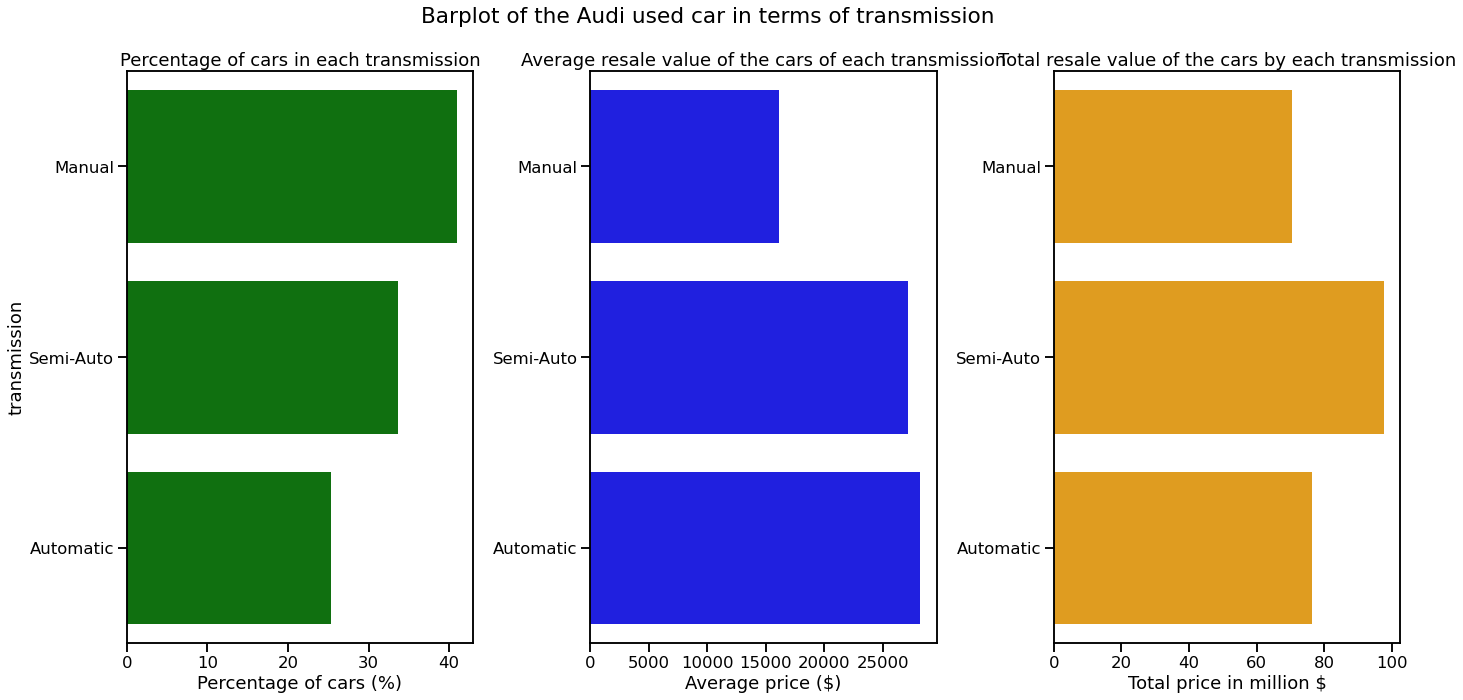

In [27]:
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Total resale value of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car in terms of transmission")
plt.tight_layout()
plt.show()

#### From the above Data Visualiation we can come to the conclusion that :
- a)From the above data visualization we can see that 42% cars' are manual, 34% cars' are semi-auto, 25% cars' are automatic
- b)From the second fig, The Average selling price for manual, semi-auto, automatic cars' are 17000 USD, 30000 USD, 34000 USD respectively
- c)Finally, the total selling price for manual, semi-auto, automatic cars' are 70 million USD, 95 million USD, 78 million USD respectively

#### Data aggregation respect to fuelType column

In [28]:
df_agg = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


- Here from the above statistics the total selling automobiles for the Diesel fuelType variants are 5577 in count, in average price is 23237.516227 USD and the total selling price is 129595628 USD.
- Similarly, The Hybrid fuelType variants are 28 in count. 30191.750000 USD and 845369 USD are the average and total selling prices, respectively.
- Finally,  the Petrol fuelType variants are 5063 in count. 22480.908355 USD and 113820839 USD are the average and total selling prices, respectively.

#### Data preprocessing before visualization with respect to fuelType

In [29]:
# dataframe sorting
df_agg = df_agg.sort_values(by='count', ascending=False)

# column percentage of the cars in each fuelType
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the sum column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding
df_agg = df_agg.round(2)

# removing 
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


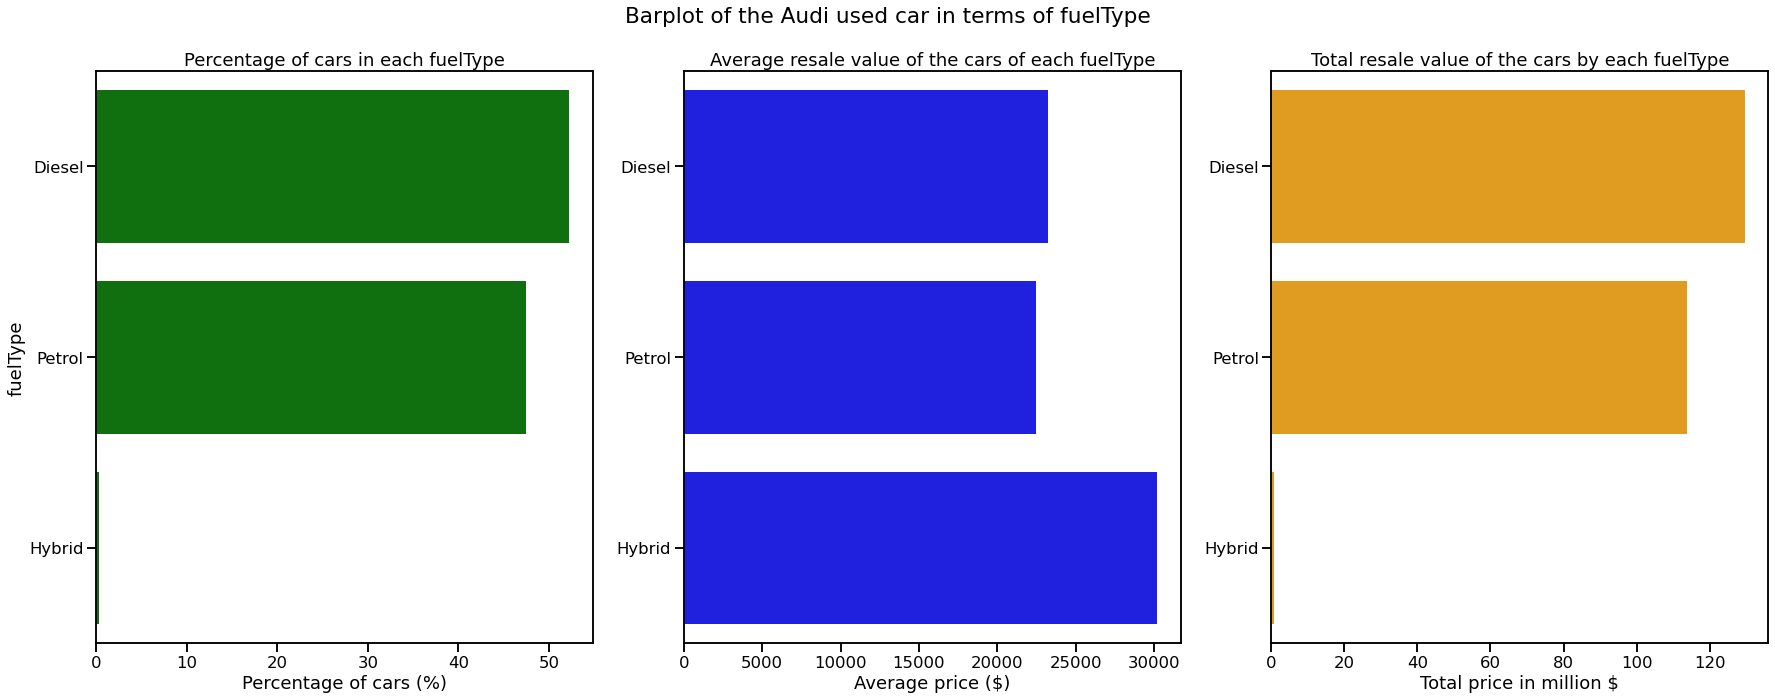

In [30]:
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Total resale value of the cars by each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car in terms of fuelType")
plt.tight_layout()
plt.show()

#### From the above Data Visualiation we can come to the conclusion that :
- The above data visualization showed that 52% cars' are Diesel engine, 48% cars' are petrol engine and Hybrid cars are almost negligible.
- From the second fig, The Average selling price for Diesel engine cars' are 26000 USD, Petrol engine cars' are 24000 USD and Hybrid cars' are 30000 USD
- Finally, The Total selling price for Diesel engine cars' are 130 million USD, Petrol engine cars' are 118 million USD and Hybrid cars' are nil

## Pivot table for calculating count, average(mean) and total selling prices of cars with respect to model column.

In [31]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858


-  According to the pivot table above, there are 1347 cars with the A1 model. The average selling price of the A1 model cars is 14327.750557 USD, with a total selling price of 19299480 USD.
 And similarly the other models

#### Pivot table for calculating count, average(mean) and total selling prices of cars with respect to transmission column.

In [32]:
df_pivot = pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


According to the pivot table above, we can say that-
- Firstly, there are a total of 2708 cars with automatic transmissions. Automatic cars had an average selling price of 28204.750000 USD and a total selling price of 76378463 USD, respectively.
- Secondly there are a total of 4369 cars with manual transmissions. Manual cars had an average selling price of 16101.033417 USD and a total selling price of 70345415 USD, respectively.
- Finally, there are a total of 3591 cars with semi-auto transmissions. Semi-auto cars had an average selling price of 27161.781676 USD and a total selling price of 97537958 USD, respectively.

#### Pivot table for calculating count, average(mean) and total selling prices of cars with respect to fuelType column.

In [33]:
df_pivot = pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


According to the pivot table above, we can say that-
- Firstly, the total number of cars with a diesel fuel type is 5577. The average selling price and total selling price for diesel fuel are 23237.51627 and 129595628 USD, respectively.
- secondly, the total number of cars with a hybrid fuel type is 28. The average selling price and total selling price for hybrid fuel are 30191.750000 and 845369 USD, respectively.
- Finally, the total number of cars with a petrol fuel type is 5063. The average selling price and total selling price for petrol fuel are 22480.908355 and 113820839 USD, respectively.